#  Neural network variance study

Here we study how variances propagate through a network

\begin{equation}
I_j = \sum_i w_{ji} x_i ~+~ b_j
\end{equation}

\begin{equation}
A_j = A(I_j)
\end{equation}

\begin{align}
F\big(x\big) ~&=~ A ~\circ~ I ~\circ A ~\circ~ I ~\circ x \\
F_k &=~ A ~\left(~ \sum_i w^{(2)}_{kj} A \left( \sum_i w^{(1)}_{ji} x_i ~+~ b^{(1)}_j \right) ~+~ b^{(2)}_k ~\right)
\end{align}


\begin{align}
\frac{\partial F_k}{\partial w^{(2)}_{kj}} ~&=~ \frac{\partial A\left(I_k\right)}{\partial I_k} \cdot \frac{\partial I_k}{\partial w^{(2)}_{kj}} ~=~ \frac{\partial A\left(I_k\right)}{\partial I_k} \cdot A\left(I_j\right) \\
\frac{\partial F_k}{\partial b^{(2)}_k} &=~ \frac{\partial A\left(I_k\right)}{\partial I_k} \cdot \frac{\partial I_k}{\partial b^{(2)}_k} ~=~ \frac{\partial A\left(I_k\right)}{\partial I_k} \\
\end{align}

\begin{align}
\frac{\partial F_k}{\partial w^{(1)}_{ji}} ~&=~ \frac{\partial A\left(I_k\right)}{\partial I_k} \cdot \sum_j~\frac{\partial I_k}{\partial A_j} \cdot \frac{\partial A\left(I_j\right)}{\partial I_j} \cdot \frac{\partial I_j}{\partial w^{(1)}_{ji}} ~=~ \frac{\partial A\left(I_k\right)}{\partial I_k} \cdot \sum_j ~ w^{(2)}_{kj} \cdot \frac{\partial A\left(I_j\right)}{\partial I_j} \cdot A\left(I_i\right) \\
\frac{\partial F_k}{\partial b^{(1)}_{i}} ~&=~ \frac{\partial A\left(I_k\right)}{\partial I_k} \cdot \sum_j~\frac{\partial I_k}{\partial A_j} \cdot \frac{\partial A\left(I_j\right)}{\partial I_j} \cdot \frac{\partial I_j}{\partial b^{(1)}_{i}} ~=~ \frac{\partial A\left(I_k\right)}{\partial I_k} \cdot \sum_j ~ w^{(2)}_{kj} \cdot \frac{\partial A\left(I_j\right)}{\partial I_j} \\
\end{align}


Or extending further, for weights the derivative is...
\begin{align}
\frac{\partial F_k}{\partial w^{(0)}_{ih}} ~&=~ \frac{\partial A\left(I_k\right)}{\partial I_k} \cdot \sum_j~\frac{\partial I_k}{\partial A_j} \cdot \frac{\partial A\left(I_j\right)}{\partial I_j} \cdot \sum_i ~ \frac{\partial I_j}{\partial A_i} \cdot \frac{\partial A\left(I_i\right)}{\partial I_i} \cdot \frac{\partial I_i}{\partial w^{(0)}_{ih}} \\
&=~ \frac{\partial A\left(I_k\right)}{\partial I_k} \cdot \sum_j ~ w^{(2)}_{kj} \cdot \frac{\partial A\left(I_j\right)}{\partial I_j} \cdot \sum_i~ w^{(1)}_{ji} \cdot \frac{\partial A\left(I_i\right)}{\partial I_i} \cdot A\left( I_h \right) \\
\end{align}




In order to keep this series on a consistent scale, i.e. with the gradients not exploding or vanishing over time, we want to ensure that initially

\begin{equation}
 | \sum_j ~ w^{(l)}_{ij} \cdot \frac{\partial A_j}{\partial I_j} | ~\sim~ 1
\end{equation}

for every layer $l$ with outputs $i=1,...,N_{out}$ and outputs $j=1,...,N_{in}$.


The optimal distribution for $w_{ij}$ therefore depends on the distribution of $\frac{\partial A_j}{\partial I_j}$, which in turn depends on the functional form of $A$ and the value of $I_j$.

If $A$ is a sigmoid, then
- $\partial_I A ~=~ A(I) \cdot \left( 1 - A(I) \right) ~\sim 0\times1 ~-~ 0.5\times0.5 ~\sim 0 ~-~ 0.25$, where the distribution depends on the distribution propagating from the previous layer, and the derivative goes to $0$ when layers start saturating

If $A$ is a leaky relu, then
- $\partial_I A ~=~ 1~$ if $~I>0~$ else $~0.2$
- initially, if weights are assigned symmetrically around 0, then 50% will be +ve and 50% will be -ve, so 0.6 on average
- If weights are uniformly distributed between $[-c,~c]$, then $0.6\cdot c\cdot 0.5\sqrt{N} \sim 1$ gives $c\sim \frac{3}{\sqrt{N}}$ where $N$ is the number of inputs to the layer.

N.B. $\langle |x| \rangle \sim 0.8$ when x is normally distributed, and $\langle |\sum_{i=0}^N x_i| \rangle \sim 0.5\sqrt{N}$ when uniformly distributed between $[-1,~1]$.

There is no optimal way to initialise weights, as there is a trade-off between
- the magnitude of the activation functions, leading to vanishing/exploding activations (for e.g. LeakyReLU) or saturation (for e.g. sigmoids)
- do you want to keep constant the length of the activation vector, or the components of it, or the sum of the components?
- the magnitude of the gradients, leading to vanishing/exploding gradients

For leakyReLU

\begin{align}
F_k &=~ A ~\left(~ \sum_i w^{(2)}_{kj} A \left( \sum_i w^{(1)}_{ji} x_i ~+~ b^{(1)}_j \right) ~+~ b^{(2)}_k ~\right) \\
 &\sim~ 0.6 ~\left(~ \sum_i w^{(2)}_{kj} 0.6 \left( \sum_i w^{(1)}_{ji} x_i ~+~ b^{(1)}_j \right) ~+~ b^{(2)}_k ~\right) \\
 &\sim~ \left(0.6\right)^2 ~ \sum_i w^{(2)}_{kj} \sum_i w^{(1)}_{ji} x_i \\
\end{align}


Initially, if weights are initialised symmetrically, the activations of previous layers will be 50% positive and 50% negative, but with the negative activations being 20% of the size. The average magnitude is therefore $0.8$ (in arbitrary units which stay constant through the network if we regularise correctly).

For each layer $l$, we want $0.6 \cdot |\sum_i w^{(l)}_{ji} A^{(l-1)}_i| ~\sim~ \frac{12}{25} |\sum_i w^{(l)}_{ji}| ~\sim~ \frac{12}{50} \sqrt{N} c ~\sim 1$. So activations (single values) are stable if
- $w\sim[-c,~c]$ with $c=\frac{4}{\sqrt{N}}$.

In [1]:
#  Required imports

import sys

import numpy as np

from matplotlib import pyplot as plt


In [2]:
#  Config values

num_toys     = 10000
input_values = [1]
layer_nodes  = [10, 20, 40, 40, 20, 10, 1]
weight_init  = "leakyrelu3"
weight_scale = 1
bias_init    = "zeros"
bias_scale   = 1
activation   = "leakyrelu"

num_layers  = len(layer_nodes)
num_outputs = layer_nodes[-1]


In [3]:
def sigmoid (v) :
    return np.array(1 / (1 + np.exp(-v)))

In [4]:

class Dense :
    def __init__ (self, name, num_nodes, num_inputs, weights_initialiser="normal", bias_initialiser="zeros", weights_scale=1, bias_scale=1) :
        self.name                = name
        self.num_nodes           = num_nodes
        self.num_inputs          = num_inputs
        self.weights_initialiser = weights_initialiser
        self.weights_scale       = weights_scale
        self.bias_initialiser    = bias_initialiser
        self.bias_scale          = bias_scale
        self.initialise()
        
    def __call__ (self, in_vector) :
        return self.fwd(in_vector)
            
    def back (self, prev_grads=None) :
        '''Compute gradients and pass values for previous layer'''
        if type(prev_grads) == type(None) : prev_grads = np.ones(shape=(self.num_nodes,))
        assert prev_grads.shape[1] == self.num_nodes, f"{self.name}: size is {self.num_nodes} but {prev_grads.shape[1]} gradients provided"
        self.weight_grads = np.array([np.outer(x, y) for x, y in zip(prev_grads, self.last_in)])
        self.bias_grads   = prev_grads.copy()
        return np.array([np.matmul(x, self.weights) for x in prev_grads])
         
    def fwd (self, in_vector) :
        '''Compute activation in fwd direction'''
        assert type(in_vector) == np.ndarray, f"{self.name}: {self.name}: Input of type {type(in_vector)} where numpy array expected"
        assert len(in_vector.shape) == 2, f"{self.name}: {self.name}: Input of shape {in_vector.shape} where (?,{self.num_inputs}) expected"
        assert in_vector.shape[1] == self.num_inputs, f"{self.name}: {self.name}: Input of shape {in_vector.shape} where (?,{self.num_inputs}) expected"
        self.last_in  = in_vector.copy()
        return np.array([np.matmul(self.weights, v) + self.biases for v in in_vector])
    
    def initialise (self, bias_initialiser=None, weights_initialiser=None, weights_scale=None, bias_scale=None) :
        '''Initialise weight matrix and bias vector'''
        #  If arguments not provided then re-initialise using storedf settings
        if type(weights_initialiser) == type(None) : weights_initialiser = self.weights_initialiser
        if type(weights_scale)       == type(None) : weights_scale       = self.weights_scale
        if type(bias_initialiser)    == type(None) : bias_initialiser    = self.bias_initialiser
        if type(bias_scale)          == type(None) : bias_scale          = self.bias_scale
        #  Initialise weights
        if weights_initialiser is "normal" :
            self.weights = np.random.normal(size=(self.num_nodes, self.num_inputs))*weights_scale
        elif weights_initialiser is "leakyrelu" :
            limit = 1. / np.sqrt(self.num_inputs) / 0.278
            self.weights = np.random.uniform(low=-limit, high=limit, size=(self.num_nodes, self.num_inputs)) * weights_scale
        elif weights_initialiser is "leakyrelu2" :
            limit = 4. / np.sqrt(self.num_inputs)   #   np.sqrt(self.num_inputs) / np.sqrt(self.num_nodes)
            self.weights = np.random.uniform(low=-limit, high=limit, size=(self.num_nodes, self.num_inputs)) * weights_scale
        elif weights_initialiser is "leakyrelu3" :
            limit = 3. / np.sqrt(self.num_inputs) / 1.2
            self.weights = np.random.uniform(low=-limit, high=limit, size=(self.num_nodes, self.num_inputs)) * weights_scale
        elif weights_initialiser is "relu" :
            self.weights = np.random.normal(size=(self.num_nodes, self.num_inputs)) * weights_scale * 1.25 / self.num_inputs
        elif weights_initialiser is "relu2" :
            self.weights = np.random.normal(size=(self.num_nodes, self.num_inputs)) * weights_scale * 1.25
        elif weights_initialiser is "glorot_uniform" :
            limit = np.sqrt(6. / (self.num_nodes + self.num_inputs))
            self.weights = np.random.uniform(low=-limit, high=limit, size=(self.num_nodes, self.num_inputs)) * weights_scale
        elif weights_initialiser is "zeros" :
            self.weights = np.zeros(shape=(self.num_nodes,))
        else :
            raise NotImplementedError(f"weights_initialiser {weights_initialiser} not recognised") 
        #  Initialise biases
        if   bias_initialiser is "normal" : self.biases  = np.random.normal(size=(self.num_nodes,))*bias_scale
        elif bias_initialiser is "zeros"  : self.biases  = np.zeros(shape=(self.num_nodes,))
        elif bias_initialiser is "glorot_uniform" :
            limit = np.sqrt(6. / (self.num_nodes + self.num_inputs))
            self.biases = np.random.uniform(low=-limit, high=limit, size=(self.num_nodes,)) * bias_scale
        else : raise NotImplementedError(f"bias_initialiser {bias_initialiser} not recognised") 
        
        
class Activation :
    def __init__ (self, name, num_nodes, activation="relu") :
        self.name       = name
        self.activation = activation
        self.initialise()
            
    def __call__ (self, in_vector) :
        return self.fwd(in_vector)
            
    def back (self, prev_grads=None) :
        '''Pass gradient back to previous layer'''
        assert hasattr(self, "last_in"), f"{self.name}: back() cannot be called until after a fwd() pass"
        num_nodes = self.last_in.shape[1]
        if type(prev_grads) == type(None) : prev_grads = np.ones(shape=(num_nodes,))
        assert prev_grads.shape[1] == num_nodes, f"{self.name}: size is {num_nodes} but {prev_grads.shape[1]} gradients provided"
        return np.array([x*y for x, y in zip(self.grad(self.last_in), prev_grads)])
         
    def fwd (self, in_vector) :
        '''Compute activation in fwd direction'''
        assert type(in_vector) == np.ndarray, f"{self.name}: {self.name}: Input of type {type(in_vector)} where numpy array expected"
        assert len(in_vector.shape) == 2, f"{self.name}: {self.name}: Input of shape {in_vector.shape} where (?,?) expected"
        self.last_in  = in_vector.copy()
        return self.activate(in_vector)
    
    def initialise (self, activation=None) :
        '''Set the activation function'''
        if type(activation) == type(None) : activation = self.activation
        if activation is "leakyrelu" :
            self.activate = lambda x : np.array([[0.2*v if v < 0 else v for v in row] for row in x])
            self.grad     = lambda x : np.array([[0.2   if v < 0 else 1 for v in row] for row in x])
        elif activation is "relu" :
            self.activate = lambda x : np.array([[np.max([0, v]) for v in row] for row in x])
            self.grad     = lambda x : np.array([[0 if v < 0 else 1 for v in row] for row in x])
        elif activation is "sigmoid" :
            self.activate = lambda x : sigmoid(x)
            self.grad     = lambda x : sigmoid(x) * (1. - sigmoid(x))
        else :
            raise NotImplementedError(f"activation {activation} not recognised")
            

In [5]:
#  Create network

num_inputs, layers = len(input_values), []
for layer_idx, num_nodes in enumerate(layer_nodes) :
    layers.append(Dense     (f"I{layer_idx+1}", num_nodes, num_inputs, 
                             weights_initialiser = weight_init, weights_scale = weight_scale, 
                             bias_initialiser    = bias_init  , bias_scale    = bias_scale  ))
    layers.append(Activation(f"A{layer_idx+1}", num_nodes, activation))
    num_inputs = num_nodes
    

In [6]:
#  Run toys

in_array = np.full(fill_value=input_values, shape=(1, len(input_values)))
    
toy_results = []
for toy_idx in range(num_toys) :
    sys.stdout.write(f"\rRunning toy {toy_idx+1} / {num_toys}")
    #  fwd pass
    values             = in_array
    toy_values         = []
    weights_and_biases = []
    for layer in layers :
        layer.initialise()
        values = layer.fwd(values)
        toy_values.append(values[0])
        layer_weights_bias = []
        if hasattr(layer, "weights") : layer_weights_bias.append(layer.weights)
        else : layer_weights_bias.append([])
        if hasattr(layer, "biases" ) : layer_weights_bias.append(layer.biases )
        else : layer_weights_bias.append([])
        weights_and_biases.append(layer_weights_bias)
    #  back pass
    grads     = np.ones_like(values)
    toy_grads = []
    for layer in layers[::-1] :
        grads       = layer.back(grads)
        layer_grads = []
        if hasattr(layer, "weight_grads") : layer_grads.append(layer.weight_grads[0])
        else : layer_grads.append([])
        if hasattr(layer, "bias_grads"  ) : layer_grads.append(layer.bias_grads  [0])
        else : layer_grads.append([])
        toy_grads.append(layer_grads)
    toy_results.append([values[0], grads[0], toy_values, toy_grads[::-1], weights_and_biases])
    

Running toy 10000 / 10000

In [7]:
#  Process results

toys_outputs = []
for toy_result in toy_results :
    toys_outputs.append(toy_result[0][0])   #  One output, so take index 0

toys_grads = []
for toy_result in toy_results :
    toys_grads.append(toy_result[1][0])     #  One input, so take index 0

toys_activations = [[] for i in range(len(layers))]
for toy_result in toy_results :
    for i in range(len(layers)) :
        toys_activations[i].append(toy_result[2][i])

toys_weight_gradients = [[] for i in range(len(layers))]
toys_bias_gradients   = [[] for i in range(len(layers))]
for toy_result in toy_results :
    for i in range(len(layers)) :
        toys_weight_gradients[i].append(toy_result[3][i][0])
        toys_bias_gradients  [i].append(toy_result[3][i][1])

toys_weights = [[] for i in range(len(layers))]
toys_biases  = [[] for i in range(len(layers))]
for toy_result in toy_results :
    for i in range(len(layers)) :
        weights, biases = toy_result[4][i][0], toy_result[4][i][1]
        if type(weights) == np.ndarray : weights = weights.flatten()
        if type(biases ) == np.ndarray : biases  = biases .flatten()
        toys_weights[i].append(weights)
        toys_biases [i].append(biases )
    

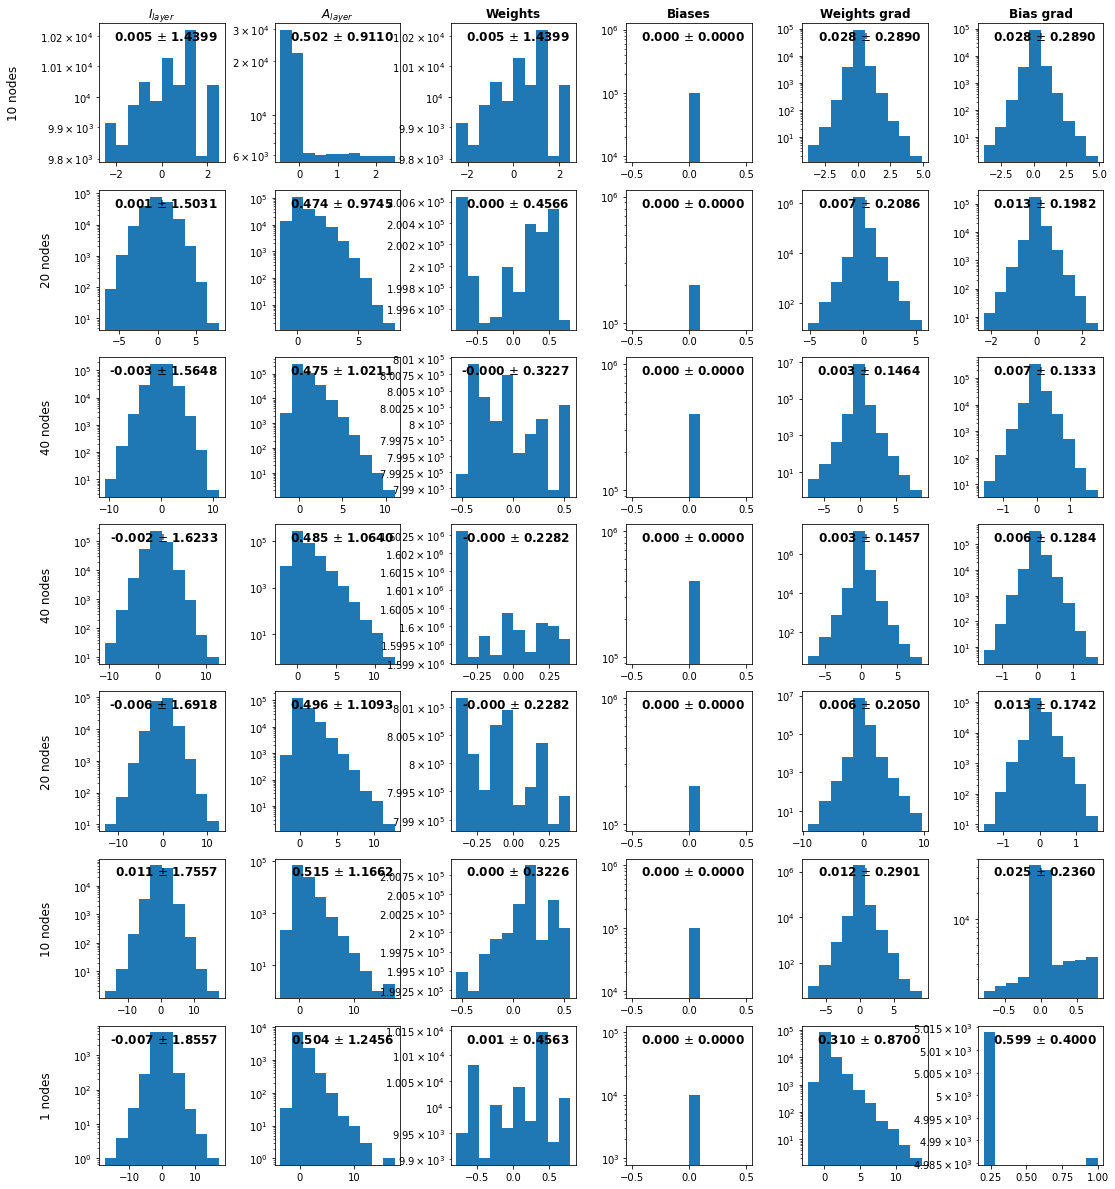

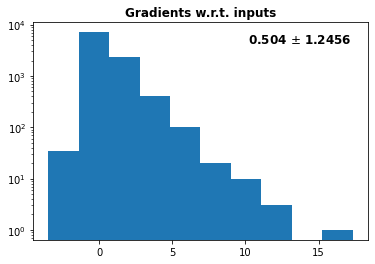

In [8]:
#  Plot results

fig = plt.figure(figsize=(18, 3*num_layers))
for layer_idx in range(num_layers) :
    values_in    = np.array(toys_activations[2*layer_idx  ]).flatten()
    values_out   = np.array(toys_activations[2*layer_idx+1]).flatten()
    weight_grads = np.array(toys_weight_gradients[2*layer_idx]).flatten()
    bias_grads   = np.array(toys_bias_gradients  [2*layer_idx]).flatten()
    weights      = np.array(toys_weights[2*layer_idx]).flatten()
    biases       = np.array(toys_biases [2*layer_idx]).flatten()
    ax = fig.add_subplot(num_layers, 6, 6*layer_idx+1)
    ax.hist(values_in)
    ax.text(0.95, 0.95, f"{np.mean(values_in):.3f} $\pm$ {np.std(values_in):.4f}", ha="right", va="top", fontsize=12, transform=ax.transAxes, weight="bold")
    if layer_idx == 0 : ax.set_title("$I_{layer}$", fontsize=12, weight="bold")
    ax.set_yscale("log")
    ax.set_ylabel(f"{layer_nodes[layer_idx]} nodes", labelpad=20, fontsize=12)
    ax = fig.add_subplot(num_layers, 6, 6*layer_idx+2)
    ax.hist(values_out)
    ax.text(0.95, 0.95, f"{np.mean(values_out):.3f} $\pm$ {np.std(values_out):.4f}", ha="right", va="top", fontsize=12, transform=ax.transAxes, weight="bold")
    if layer_idx == 0 : ax.set_title("$A_{layer}$", fontsize=12, weight="bold")
    ax.set_yscale("log")
    if len(weights) > 0 :
        ax = fig.add_subplot(num_layers, 6, 6*layer_idx+3)
        ax.hist(weights)
        ax.text(0.95, 0.95, f"{np.mean(weights):.3f} $\pm$ {np.std(weights):.4f}", ha="right", va="top", fontsize=12, transform=ax.transAxes, weight="bold")
        if layer_idx == 0 : ax.set_title("Weights", fontsize=12, weight="bold")
        ax.set_yscale("log")
    if len(biases) > 0 :
        ax = fig.add_subplot(num_layers, 6, 6*layer_idx+4)
        ax.hist(biases)
        ax.text(0.95, 0.95, f"{np.mean(biases):.3f} $\pm$ {np.std(biases):.4f}", ha="right", va="top", fontsize=12, transform=ax.transAxes, weight="bold")
        if layer_idx == 0 : ax.set_title("Biases", fontsize=12, weight="bold")
        ax.set_yscale("log")
    if len(weight_grads) > 0 :
        ax = fig.add_subplot(num_layers, 6, 6*layer_idx+5)
        ax.hist(weight_grads)
        ax.text(0.95, 0.95, f"{np.mean(weight_grads):.3f} $\pm$ {np.std(weight_grads):.4f}", ha="right", va="top", fontsize=12, transform=ax.transAxes, weight="bold")
        if layer_idx == 0 : ax.set_title("Weights grad", fontsize=12, weight="bold")
        ax.set_yscale("log")
    if len(bias_grads) > 0 :
        ax = fig.add_subplot(num_layers, 6, 6*layer_idx+6)
        ax.hist(bias_grads)
        ax.text(0.95, 0.95, f"{np.mean(bias_grads):.3f} $\pm$ {np.std(bias_grads):.4f}", ha="right", va="top", fontsize=12, transform=ax.transAxes, weight="bold")
        if layer_idx == 0 : ax.set_title("Bias grad", fontsize=12, weight="bold")
        ax.set_yscale("log")
plt.subplots_adjust(wspace=0.4)
plt.show()

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.hist(toys_grads)
ax.text(0.95, 0.95, f"{np.mean(toys_grads):.3f} $\pm$ {np.std(toys_grads):.4f}", ha="right", va="top", fontsize=12, transform=ax.transAxes, weight="bold")
ax.set_title(f"Gradients w.r.t. inputs", fontsize=12, weight="bold")
ax.set_yscale("log")
plt.show()
    

In [9]:

N = np.linspace(2, 20, 19)

m, s = [], []

for n in N :
    n = int(n)
    sys.stdout.write(f"\r{n}")
    toys = []
    for i in range(30000) :
        toys.append(np.sum(np.random.uniform(low=-1, high=1, size=(n,))))
    toys = np.fabs(toys)
    m.append(np.mean(toys))
    s.append(np.std(toys))

m, s = np.array(m), np.array(s)

20

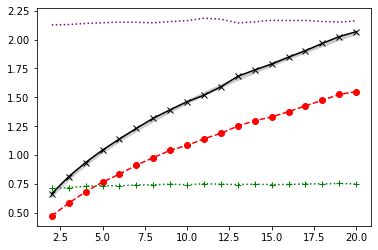

In [10]:
   
plt.plot(N, m, "x-" , color="k")    
plt.plot(N, s, "o--", color="r")  
plt.plot(N, s/m, "+:", color="g")
plt.plot(N, np.sqrt(N)/m, ":", color="purple")

plt.plot(N, 0.46*np.sqrt(N), "-", color="k", alpha=0.2, lw=4) 

plt.show()


In [11]:
const = np.mean(m/np.sqrt(N))
print(const)

0.4641333590822034


In [12]:
0.6*const

0.278480015449322

In [13]:
'''
N = [5, 10, 20, 40]
M = [5, 10, 20, 40]

for n in N :
    for m in M :
        sys.stdout.write(f"\r{n}  {m}")
        toys = []
        for i in range(10000) :
            weights = np.random.uniform(low=-1, high=1, size=(n,m))
            toys.append(np.linalg.det(weights))
        toys = np.fabs(toys)
        sys.stdout.write(f"\r{n}  {m}   {np.mean(toys)}   {np.std(toys)}\n")
        '''

'\nN = [5, 10, 20, 40]\nM = [5, 10, 20, 40]\n\nfor n in N :\n    for m in M :\n        sys.stdout.write(f"\r{n}  {m}")\n        toys = []\n        for i in range(10000) :\n            weights = np.random.uniform(low=-1, high=1, size=(n,m))\n            toys.append(np.linalg.det(weights))\n        toys = np.fabs(toys)\n        sys.stdout.write(f"\r{n}  {m}   {np.mean(toys)}   {np.std(toys)}\n")\n        '

In [14]:
#  Propagate and backprop a single toy through the network

in_array = np.array([[1.1]]) # np.full(fill_value=input_values, shape=(1, len(input_values)))
    
activations = []
weights     = []

values     = in_array
for layer in layers :
    layer.initialise()
    values = layer.fwd(values)
    activations.append(values[0])
    if hasattr(layer, "weights") : weights.append(layer.weights)
    
grads        = np.ones_like(values)
weight_grads = []
for layer in layers[::-1] :
    grads = layer.back(grads)
    if hasattr(layer, "weight_grads") : weight_grads.append(layer.weight_grads[0])


In [15]:
#  Print activations in all layers

'''for layer, row in zip(layers, activations) :
    print(layer.name, row)'''

'for layer, row in zip(layers, activations) :\n    print(layer.name, row)'

In [16]:
def activate_leakyrelu (x, g=0.2) :
    if type(x) == np.ndarray :
        return np.array([activate(xp) for xp in x])
    if x < 0 :
        return g*x
    return x

In [17]:
#  Show that activation calculation is correct using independent code

values = in_array[0]
print("IN")
print(", ".join([f"{v:.2f}" for v in values]))
for layer, exp_act in zip(layers, activations) :
    if layer.name[0] == "I" :
        w      = layer.weights
        values = np.matmul(w, values)
    elif layer.name[0] == "A" :
        values = activate_leakyrelu(values)
    else : raise RuntimeError(f"Layer {layer.name} not recognised")
    print(layer.name)
    print(", ".join([f"{v/a:.2f}" for v, a in zip(values, exp_act)]))

IN
1.10
I1
1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00


NameError: name 'activate' is not defined

In [ ]:
#  Show that the gradient calculation is correct using independent code

'''A9 , A8 , A7 , A6  = activations [-1], activations [-3], activations [-5], activations [-7]
I9 , I8 , I7 , I6  = activations [-2], activations [-4], activations [-6], activations [-8]
W9 , W8 , W7 , W6  = weights     [-1], weights     [-2], weights     [-3], weights     [-4]
dW9, dW8, dW7, dW6 = weight_grads[0 ], weight_grads[1 ], weight_grads[2 ], weight_grads[3 ]

dA9_by_dI9 = np.array([0.2 if v<0 else 1 for v in I9])
print("\ndA9_by_dI9", dA9_by_dI9)

print("\nI9 shape is", I9.shape)
print("W9 shape is", W9.shape)
print("dW9 shape is", dW9.shape)

dA9_by_dA8 = np.matmul(dA9_by_dI9, W9)
print("\ndA9_by_dA8", dA9_by_dA8)

print("\nA8 shape is", A8.shape)

dA9_by_dI8 = np.array([0.2 if v<0 else 1 for v in I8]) * dA9_by_dA8
print("\ndA9_by_dI8", dA9_by_dA8)

print("\nI8 shape is", I8.shape)
print("W8 shape is", W8.shape)
print("dW8 shape is", dW8.shape)

dA9_by_dA7 = np.matmul(dA9_by_dI8, W8)
print("\ndA9_by_dA7", dA9_by_dA7)

print("\nA7 shape is", A7.shape)

dA9_by_dI7 = np.array([0.2 if v<0 else 1 for v in I7]) * dA9_by_dA7
print("\ndA9_by_dI7", dA9_by_dA7)





dA9_by_dW8 = np.outer(dA9_by_dI8, A7)
print("\ndA9_by_dW8")
print(dA9_by_dW8)

print("\ndW8")
print(dW8)

print("\nRatio")
print(dA9_by_dW8/dW8)
'''

In [ ]:
x = np.array([1])
print("x is " + ", ".join([f"{xp:.2f}" for xp in x]))

N1 = 10
w1 = np.full(fill_value=1, shape=(N1, 1))
I1 = np.matmul(w1, x)
A1 = activate(I1)
print("A1 is " + ", ".join([f"{xp:.2f}" for xp in A1]))

N2 = 40
w2 = np.full(fill_value=1/N1, shape=(N2, N1))
I2 = np.matmul(w2, A1)
A2 = activate(I2)
print("A2 is " + ", ".join([f"{xp:.2f}" for xp in A2]))

N3 = 20
w3 = np.full(fill_value=1/N2, shape=(N3, N2))
I3 = np.matmul(w3, A2)
A3 = activate(I3)
print("A3 is " + ", ".join([f"{xp:.2f}" for xp in A3]))
